![global-terrorism-catalogue](https://storage.googleapis.com/kaggle-datasets-images/1507784/2490734/22992e0d936c2477f459441da2ea3c10/dataset-cover.png?t=2021-08-02-09-03-16)





**Disclaimer:**
*This dataset contains frequently updated information on terrorist attacks happening worldwide since 1968.*

*Dataset link:* https://www.kaggle.com/datasets/klapeyefoundation/global-terrorism

The terrorism data used in this exploratory data analysis (EDA) project is sourced from publicly available datasets related to acts of terrorism.
 The primary objective of this project is to demonstrate data analysis and visualization techniques in the context of the provided data. This project does not endorse or promote any form of violence, terrorism, or harm to individuals or groups.

The analysis and conclusions presented in this project are solely based on the patterns and insights derived from the data for educational purposes. The project aims to raise awareness about the significance of understanding and addressing global security challenges. It does not intend to pass judgment on any specific entity, ideology, or incident.

The data used in this project should not be interpreted as an endorsement or representation of the ideologies, beliefs, or actions of any particular group or individual. The focus of this project is on data analysis and visualization techniques, and any discussions or findings are limited to the scope of the provided dataset.

By accessing and reviewing this project, you acknowledge and understand the aforementioned disclaimers. The creator of this project assumes no liability for any misinterpretation, misuse, or consequences arising from the information presented herein.

This project is intended for educational purposes only and should be viewed in the context of learning about data analysis, visualization, and societal issues. If you have any concerns or questions about the content presented, please feel free to contact the creator of the project.

Thank you for understanding the purpose and scope of this project.

## Importing header files

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Dataset

In [44]:
df = pd.read_csv('/content/drive/MyDrive/PROJECTS DATABASE/klapeye-global-terrorism.csv')

In [45]:
df.shape

(27177, 12)

## Data Sanity Check

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27177 entries, 0 to 27176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         27177 non-null  object 
 1   COUNTRY      27177 non-null  object 
 2   STATE        15423 non-null  object 
 3   CITY         13151 non-null  object 
 4   SUBREGION    21182 non-null  object 
 5   REGION       21177 non-null  object 
 6   PERPETRATOR  10153 non-null  object 
 7   INJURED      27172 non-null  float64
 8   DEAD         27176 non-null  float64
 9   DESCRIPTION  27177 non-null  object 
 10  COORDINATES  27169 non-null  object 
 11  CATEGORY     21582 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.5+ MB


In [47]:
#converting the date column to date_time format
df['DATE'] = pd.to_datetime(df['DATE'])

In [48]:
df.head(10)

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
0,2023-04-02,Russia,NaN,Saint Petersburg,Eastern Europe,Europe,Darya Trepova,42.0,1.0,During a speech by military blogger Vladlen Ta...,"64.6863136,97.7453061",Explosion
1,2023-03-06,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"A terrorist attack occurred in Bolan, Balochis...","24.8546842,67.0207055",Explosion
2,2023-02-17,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,The 2023 Karachi Police Station Attack occurre...,"24.8546842,67.0207055",Assault
3,2023-01-30,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,A suicide attacker detonated a bomb during aft...,"34.0123846,71.5787458",Explosion
4,2023-01-27,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,Seven people were shot and killed and at least...,"31.7788242,35.2257626",Assault
5,2023-01-27,Iran,Tehran Province,Tehran,Southern Asia,Asia,Yasin Huseynzadeh,2.0,1.0,The Embassy of Azerbaijan in Tehran was attack...,"35.6892523,51.3896004",Assault
6,2023-01-11,Afghanistan,Kabul,Kabul,Southern Asia,Asia,Islamic State – Khorasan Province,40.0,20.0,"On the afternoon of Wednesday 11 January, an I...","34.5260109,69.1776838",Explosion
7,2022-11-13,Turkey,Istanbul Province,Istanbul,Western Asia,Asia,Kurdistan Workers' Party (PKK),81.0,6.0,A Syrian female placed a bag next to a bench o...,"41.0091982,28.9662187",Explosion
8,2022-10-29,Somalia,Banaadir,Mogadishu,Eastern Africa,Africa,Al-Shabaab,300.0,121.0,A double car bombing killed at least 121 peopl...,"2.0349312,45.3419183",Explosion
9,2022-09-05,Afghanistan,Kabul,NaN,Southern Asia,Asia,Islamic State - Khorasan Province,20.0,10.0,A suicide bomber approached the Russian embass...,"34.5260109,69.1776838",Explosion


In [49]:
df.tail()

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
27172,1968-02-21,United States,Washington,NaN,Northern America,Americas,NaN,0.0,0.0,The Soviet embassy was bombed in the early mor...,"38.8950368,-77.0365427",Explosion
27173,1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,South America,Americas,NaN,0.0,0.0,An explosion from a single stick of dynamite w...,"-33.4377756,-70.6504502",Explosion
27174,1968-02-13,Uruguay,NaN,NaN,South America,NaN,NaN,0.0,0.0,A Molotov cocktail was thrown outside the U.S....,"-32.8755548,-56.0201525",NaN
27175,1968-02-12,Dominican Republic,Distrito Nacional,Santo Domingo,Caribbean,Americas,NaN,0.0,0.0,A homemade bomb was found behind books on the ...,"18.4801972,-69.942111",Explosion
27176,1968-02-09,Argentina,NaN,NaN,South America,NaN,NaN,0.0,0.0,The second floor of the U.S. embassy residence...,"-34.9964963,-64.9672817",Assault


In [50]:
df.duplicated().sum()

0

__Observation__ No duplicate records were found

## Timeline of terrorism activities

Text(0.5, 1.0, 'Terrorist attacks year wise')

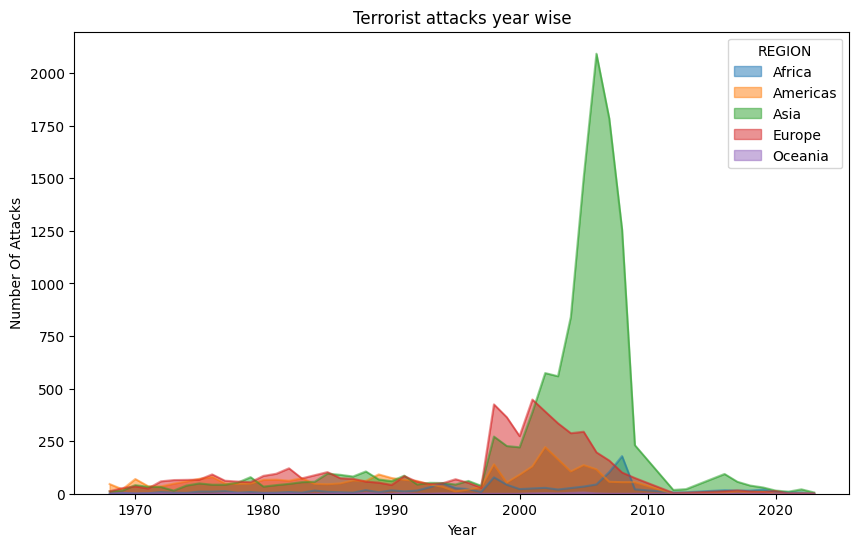

In [51]:
# Extract the year from the 'Date' column
df['Year'] = df['DATE'].dt.year

pd.crosstab(df.Year, df.REGION).plot(kind='area',stacked=False,figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number Of Attacks')
plt.title('Terrorist attacks year wise')

__Observation__
* A steep increase in terrorist activities was seen starting from the late 90's.
* The decade of 2000-2010 was most affected by terrorism, especially the asian region became the hub.
* But, thankfully after 2010 again control was found and number of terrorist activies dropped down significantly.



## Region Wise data

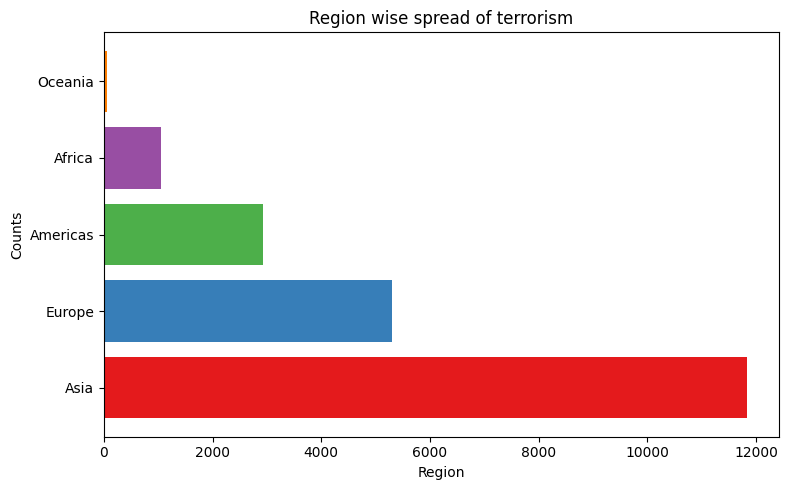

In [52]:
# Calculate value counts of 'Region' column
region_counts = df['REGION'].value_counts().reset_index()

# Rename the columns
region_counts.columns = ['Region', 'Counts']

# Create a color palette with different colors for each bar
palette = sns.color_palette("Set1", n_colors=len(region_counts))

# Create a bar plot for the counts of each region
plt.figure(figsize=(8,5))
plt.barh(region_counts['Region'], region_counts['Counts'], color=palette)
plt.xlabel('Region')
plt.ylabel('Counts')
plt.title('Region wise spread of terrorism')
plt.tight_layout()
plt.show()

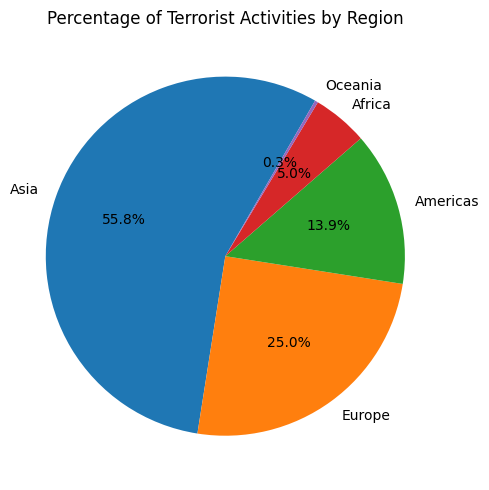

In [53]:
# Calculate value counts of 'Region' column
region_counts = df['REGION'].value_counts()

# Create a pie chart for the percentage of terrorist activities in each region
plt.figure(figsize=(5,5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%',startangle=60)
plt.title('Percentage of Terrorist Activities by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()

__Observation__
* More than 50% of the terrorist activities are concentrated in the "Asia" region.

## Sub-Region Wise

List of top 15 areas highly affected by terrorism:


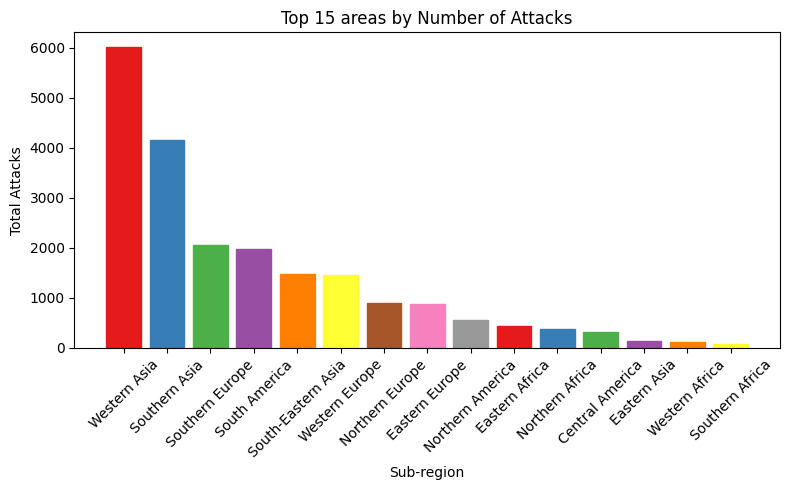

In [54]:
sr = df['SUBREGION'].value_counts().reset_index()
sr.columns = ['sub-region', 'Total Attacks']

print("List of top 15 areas highly affected by terrorism:", )
top_n = 15 # Choose the number of top areas to display

# Create a color palette with different colors for each bar
palette = sns.color_palette("Set1", n_colors=top_n)

plt.figure(figsize=(8,5))
bars = plt.bar(sr['sub-region'][:top_n], sr['Total Attacks'][:top_n])

# Assign colors from the palette to the bars
for bar, color in zip(bars, palette):
    bar.set_color(color)

plt.xlabel('Sub-region')
plt.ylabel('Total Attacks')
plt.title(f'Top {top_n} areas by Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Country Wise data

In [55]:
countries_affected = df['COUNTRY'].unique()

In [56]:
#LIST OF DIFFERENT CITIES
print("list of countries affected:\n",countries_affected)


list of countries affected:
 ['Russia' 'Pakistan' 'Israel' 'Iran' 'Afghanistan' 'Turkey' 'Somalia'
 'Indonesia' 'India' 'Norway' 'Mali' 'Syria' 'Congo' 'Iraq'
 'United Arab Emirates' 'United States' 'Nigeria' 'United Kingdom'
 'New Zealand' 'Burkina Faso' 'Peru' 'Mozambique' 'Yemen' 'Austria'
 'France' 'Croatia' 'Germany' 'Philippines' 'Niger' 'Cameroon' 'Ukraine'
 'Canada' 'Kenya' 'Gaza' 'Egypt' 'Ethiopia' 'Saudi Arabia' 'Sudan'
 'Lebanon' 'Nepal' 'Sri Lanka' 'Italy' 'Netherlands' 'Bangladesh'
 'Philliphines' 'Colombia' 'Morocco' 'Belgium' 'Australia' 'Venezuela'
 'China' 'Libya' 'Spain' 'Tajikistan' 'Zimbabwe' 'Myanmar' 'Bolivia'
 'Finland' 'Jordan' 'Thailand' 'Sweden' 'Malta' 'Kyrgyzstan' 'Armenia'
 'Kazakhstan' 'Malaysia' "Cote D'Ivoire (Ivory Coast)" 'Tunisia' 'Algeria'
 'Bulgaria' 'Greece' 'Honduras' 'Serbia' 'Chile' 'Uzbekistan'
 'Bosnia & Herzegovina' 'Georgia' 'Bosnia and Herzegovina' 'Azerbaijan'
 'Bhutan' 'Hungary' 'Kosovo' 'Lithuania' 'Burundi' 'Cambodia' 'Albania'
 'Mexico

In [57]:
len(countries_affected)

175

__A total of 175 different countries were affected by attacks of terrorism.__

In [58]:
country_attacks = df['COUNTRY'].value_counts().reset_index()
country_attacks.columns = ['Country', 'Total Attacks']

print("List of top 15 countries highly affected by terrorism:", )

List of top 15 countries highly affected by terrorism:


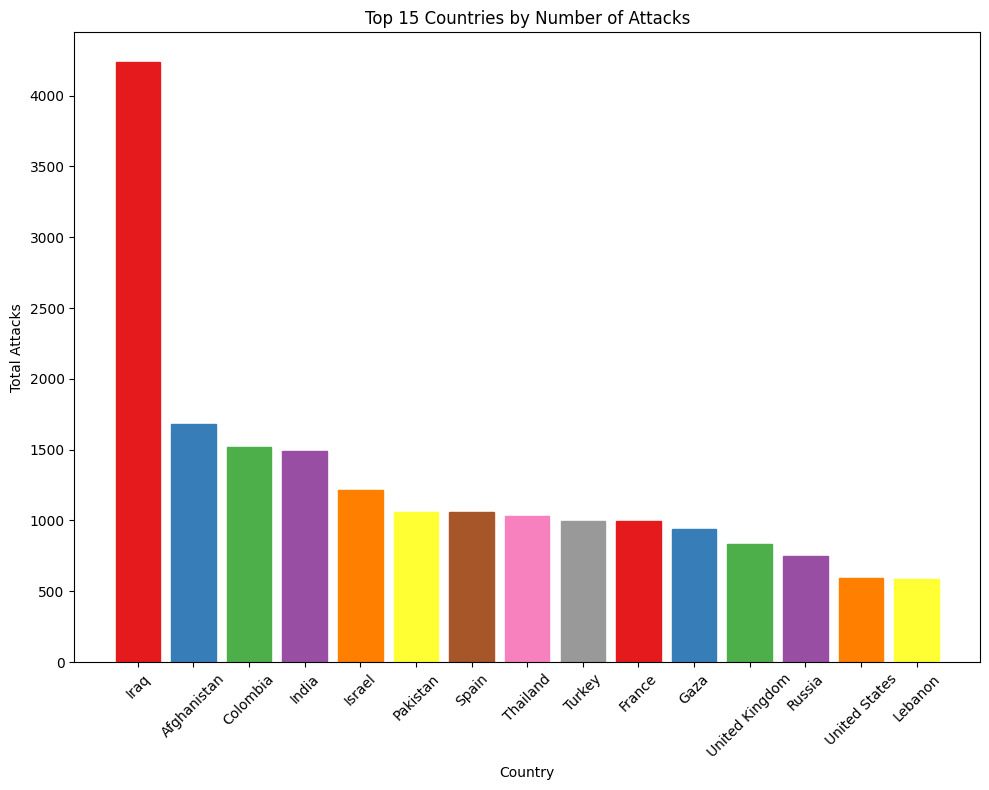

In [59]:
top_n = 15 # Choose the number of top countries to display

# Create a color palette with different colors for each bar
palette = sns.color_palette("Set1", n_colors=top_n)

plt.figure(figsize=(10,8))
bars = plt.bar(country_attacks['Country'][:top_n], country_attacks['Total Attacks'][:top_n])

# Assign colors from the palette to the bars
for bar, color in zip(bars, palette):
    bar.set_color(color)

plt.xlabel('Country')
plt.ylabel('Total Attacks')
plt.title(f'Top {top_n} Countries by Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



__Iraq is the most affected country by terrorism.__

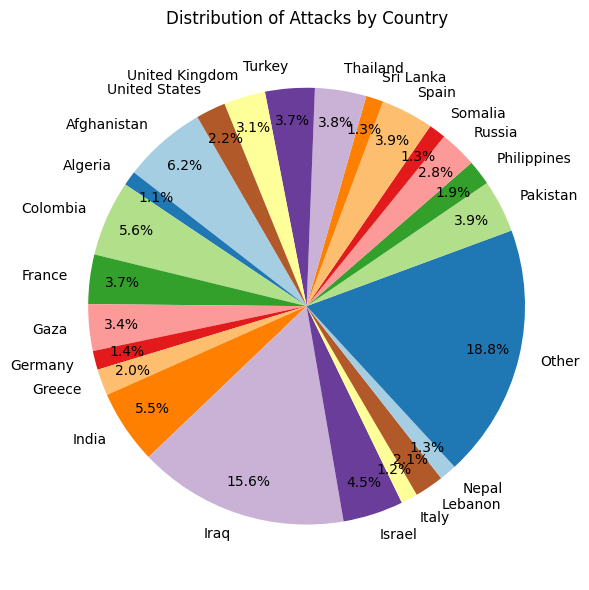

In [60]:

# Calculate the total number of attacks
total_attacks = country_attacks['Total Attacks'].sum()

# Calculate the threshold for countries with less than 1% attacks
threshold = total_attacks * 0.01

# Group countries with less than the threshold into an "Other" category
country_attacks.loc[country_attacks['Total Attacks'] < threshold, 'Country'] = 'Other'
country_attacks = country_attacks.groupby('Country')['Total Attacks'].sum().reset_index()

# Create a color palette for the pie chart
colors = plt.cm.Paired.colors

# Create a pie chart with a custom start angle
plt.figure(figsize=(6,6))
plt.pie(country_attacks['Total Attacks'], labels=country_attacks['Country'], autopct='%1.1f%%',pctdistance=0.85, startangle=120, colors=colors)
plt.title('Distribution of Attacks by Country')
plt.axis('equal')
plt.tight_layout()
plt.show()

__Observation__
* Iraq has faced more than 15% of the whole world's terrorist attacks.
* Afghanistan, Colombia and India are the other top victims of it having faced 6.2%, 5.6% and 5.5% of the total attacks respectively.

### Most Targeted cities

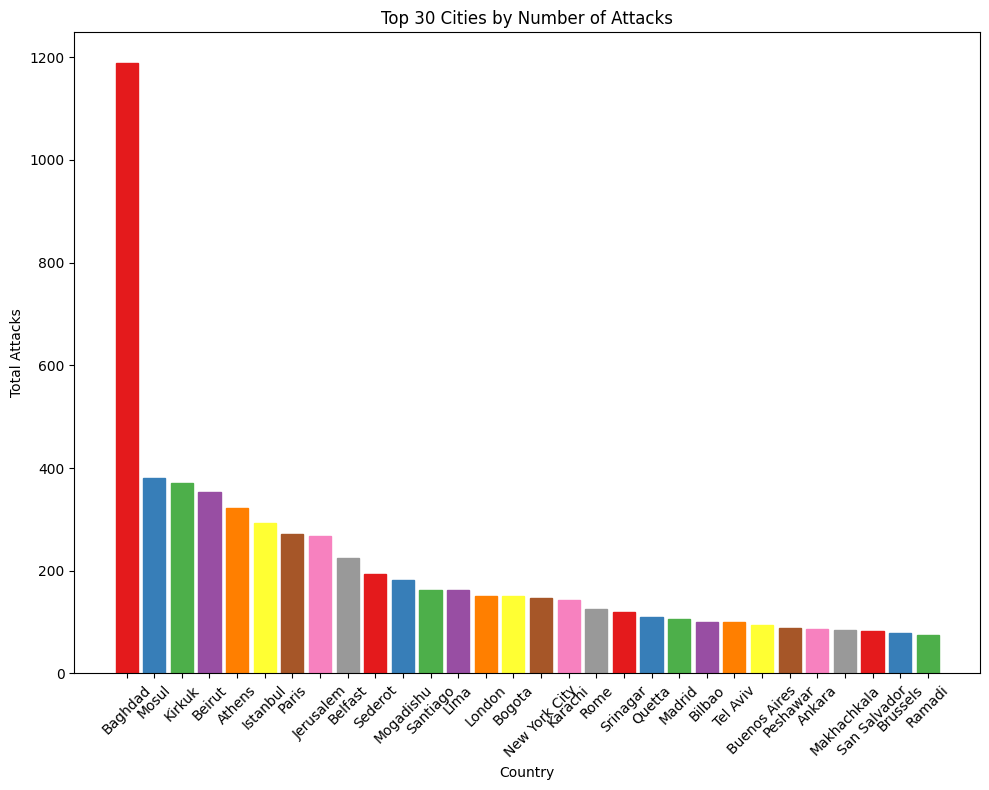

In [67]:
cities = df['CITY'].value_counts().reset_index()
cities.columns = ['Cities', 'Total Attacks']
top_n = 30 # Choose the number of top countries to display

# Create a color palette with different colors for each bar
palette = sns.color_palette("Set1", n_colors=top_n)

plt.figure(figsize=(10,8))
bars = plt.bar(cities['Cities'][:top_n], cities['Total Attacks'][:top_n])

# Assign colors from the palette to the bars
for bar, color in zip(bars, palette):
    bar.set_color(color)

plt.xlabel('Country')
plt.ylabel('Total Attacks')
plt.title(f'Top {top_n} Cities by Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Types of Attacks

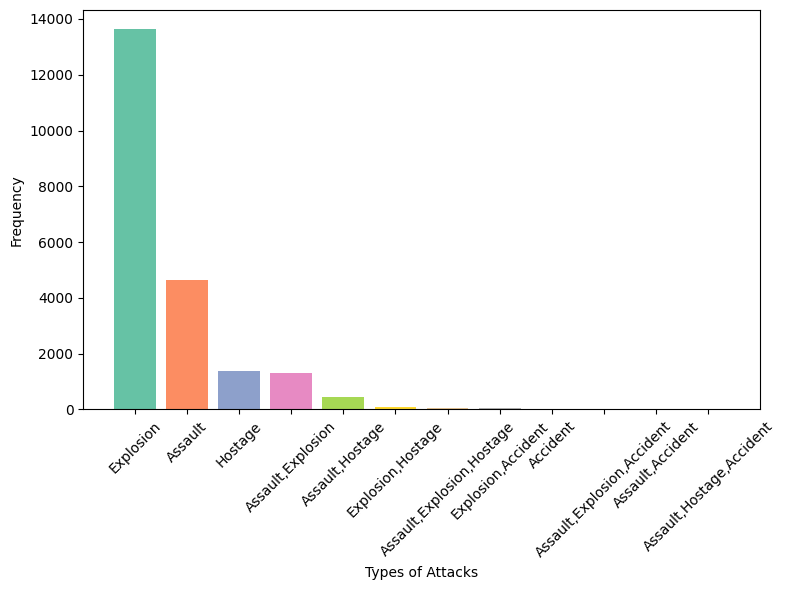

In [62]:
attack_types = df['CATEGORY'].value_counts().reset_index()
attack_types.columns = ['type', 'frequency']

plt.figure(figsize=(8,6))
# Create a color palette with different colors for each bar
palette = sns.color_palette("Set2", n_colors=len(attack_types['type']))
plt.bar(attack_types['type'], attack_types['frequency'],color=palette)
plt.xlabel('Types of Attacks')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


__Observation__
* Bomb-explosions were the most common form of disturbances used by the terrorists, followed by cases of assault and hostages.

## Perpetrators Involved

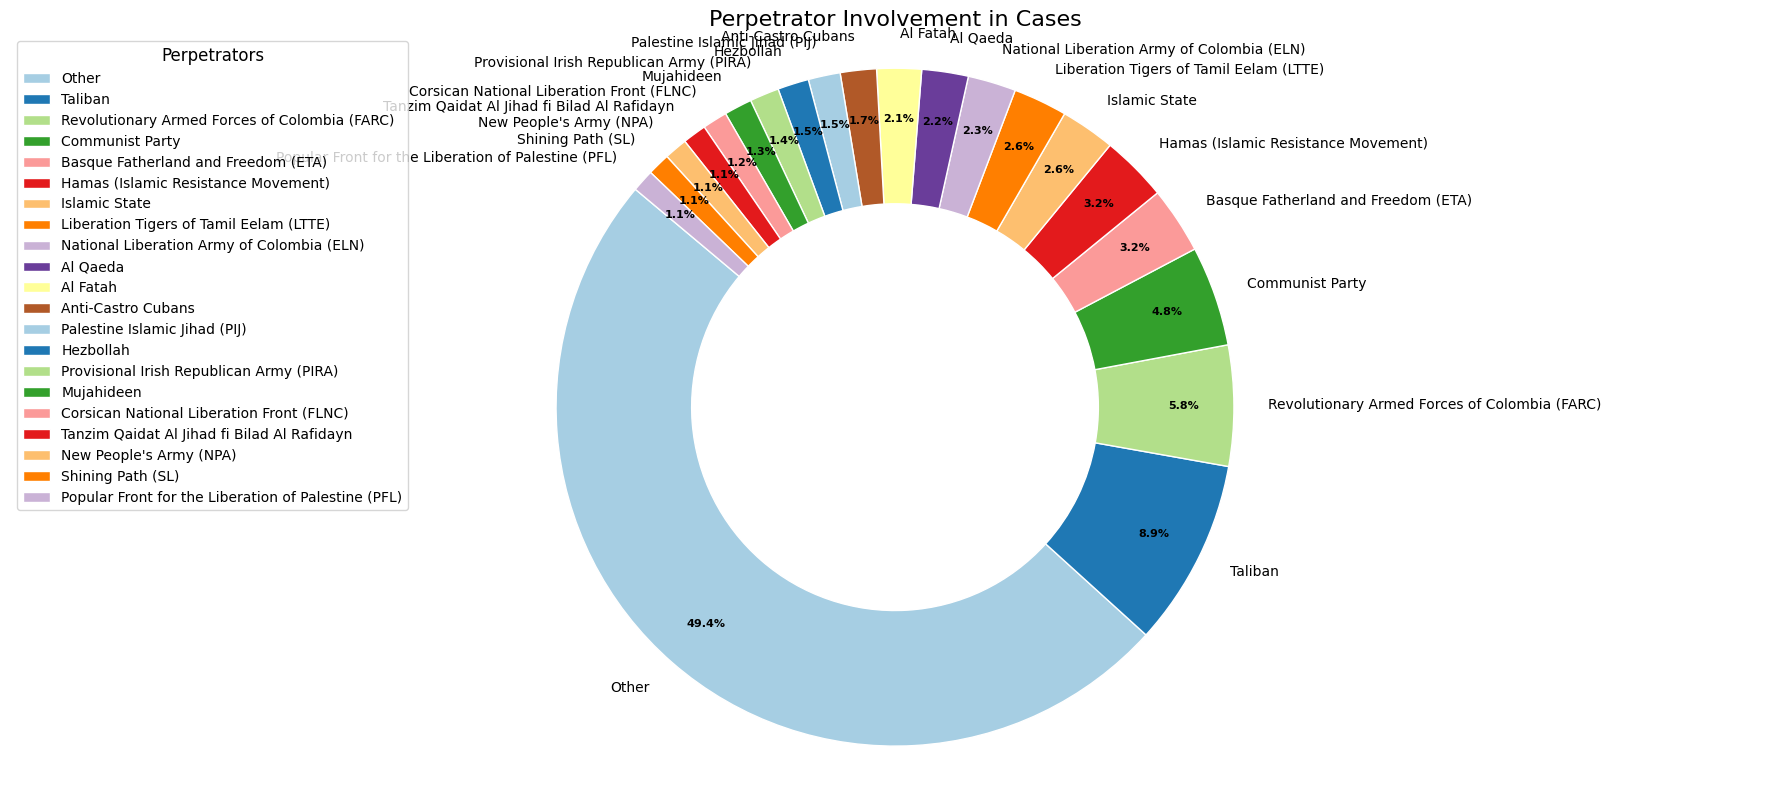

In [63]:
accused = df['PERPETRATOR'].value_counts().reset_index()
accused.columns = ['perpetrators', 'num_of_cases']

# Calculate the threshold for grouping smaller categories
threshold_percentage = 1
total_cases = accused['num_of_cases'].sum()
threshold = total_cases * (threshold_percentage / 100)

# Group perpetrators with less than the threshold into an "Other" category
filtered_accused = accused[accused['num_of_cases'] >= threshold].copy()
total_other_cases = total_cases - filtered_accused['num_of_cases'].sum()
filtered_accused = filtered_accused.append({'perpetrators': 'Other', 'num_of_cases': total_other_cases}, ignore_index=True)

# Sort the data for better visualization
filtered_accused = filtered_accused.sort_values(by='num_of_cases', ascending=False)

# Create a color palette for the pie chart
colors = plt.cm.Paired.colors

# Create a pie chart with a custom start angle and colors
plt.figure(figsize=(18,8))
wedges, texts, autotexts = plt.pie(
    filtered_accused['num_of_cases'],
    labels=filtered_accused['perpetrators'],
    autopct=lambda p: '{:.1f}%'.format(p),
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    textprops=dict(size=10),
    pctdistance=0.85,
)

# Draw circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Style the labels and legends
plt.setp(autotexts, size=8, weight='bold')
plt.title('Perpetrator Involvement in Cases', fontsize=16)
plt.legend(
    loc='upper left',
    labels=filtered_accused['perpetrators'],
    fontsize=10,
    title='Perpetrators',
    title_fontsize=12,
)
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

__Observation__
* Taliban, FARC, Communist party, ETA and HAMAS were some of the most active terrorist groups involved in terrorism activities.
* In nearly 10% of the terrorist activities during this time period, Taliban was involved.
* Also, about 50% of the cases were from some groups which were not long existant i.e, they contributed to less than 1% of the total terrorism.

## TOTAL LOSS INCURRED

In [64]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'deaths' and 'injured' columns

total_deaths = df['DEAD'].sum()
total_injured = df['INJURED'].sum()

print(f"Total Deaths: {total_deaths}")
print(f"Total Injured: {total_injured}")

Total Deaths: 84015.0
Total Injured: 170110.0


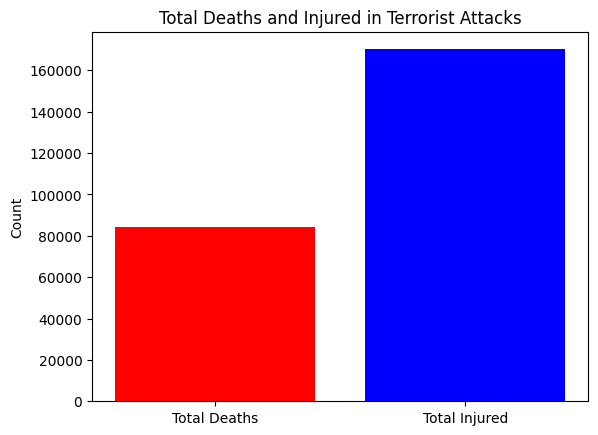

In [65]:
import matplotlib.pyplot as plt

# Assuming you have calculated total_deaths and total_injured
labels = ['Total Deaths', 'Total Injured']
values = [total_deaths, total_injured]

plt.bar(labels, values, color=['red', 'blue'])
plt.title('Total Deaths and Injured in Terrorist Attacks')
plt.ylabel('Count')
plt.show()


## CONCLUSION

After conducting Exploratory Data Analysis (EDA) on the global terrorism dataset, several key insights have emerged, shedding light on the complex and significant nature of the global terrorism landscape. Understanding these insights is crucial for addressing and mitigating the threats posed by terrorism. Here are the summarized findings and the significance of comprehending the global terrorism landscape:

1. **Rising Trend in Terrorism**:
The EDA reveals a concerning upward trend in the number of terrorist attacks over the **last decade**. This indicates the persistent challenges faced by nations worldwide in maintaining security and stability.

2. **Geographical Hotspots**:
Certain regions like **Asia & Europe** and countries like **Iraq, Afghanistan and Colombia** consistently experience a higher frequency of attacks. These geographical hotspots underscore the need for focused counterterrorism efforts in specific areas.

3. **Varied Attack Types**:
The dataset demonstrates a wide range of attack types, from **bombings and shootings** to kidnappings and armed assaults. Recognizing this diversity is crucial for crafting targeted response strategies.

4. **High Casualties**:
The EDA reveals a distressing number of casualties, including deaths and injuries, resulting from terrorist activities. Understanding these impacts underscores the urgency of preventive measures.

5. **Influence of Ideology**:
The ideologies behind terrorist groups significantly influence their actions. Recognizing these motivations aids in comprehending the underlying factors driving their activities.

6. **Policy Implications**:
The insights gained from the EDA have direct implications for policy formulation. Crafting effective counterterrorism policies requires an accurate understanding of attack patterns and trends.

7. **Public Awareness**:
Increased awareness of the global terrorism landscape enables individuals and communities to be vigilant and report suspicious activities. Public involvement is vital in preventing attacks.

In conclusion, the EDA of the global terrorism dataset highlights the complex nature of terrorist activities and their far-reaching consequences. Understanding these insights is paramount for policymakers, security agencies, and society at large. By comprehending the global terrorism landscape, we can collectively work towards minimizing threats, fostering international cooperation, and ultimately promoting peace and security on a global scale.